## Step 1: Data Cleaning and Preparation

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('Cardiotocographic.csv')
data.head()


,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [4]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64


In [5]:
# Check data types and correct if necessary
print("Data Types:\n", data.dtypes)

# Handle missing values (if any) - Example: Impute with median
data.fillna(data.median(), inplace=True)

# Confirm no missing values remain
print("Missing Values After Imputation:\n", data.isnull().sum())

Data Types:
 LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object
Missing Values After Imputation:
 LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64


In [6]:
# Handle outliers using the IQR method
for column in data.columns:
    Q1, Q3 = data[column].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    data[column] = data[column].clip(lower, upper)

# Display a summary of the cleaned data
print(data.describe())

                LB           AC           FM           UC           DL  \
count  2126.000000  2126.000000  2126.000000  2126.000000  2126.000000   
mean    133.290331     0.003132     0.001568     0.004362     0.001770   
std       9.930268     0.003828     0.002485     0.003001     0.002668   
min     105.000000    -0.008409    -0.003850    -0.005177    -0.004934   
25%     126.000000     0.000000     0.000000     0.001851     0.000000   
50%     133.000000     0.001634     0.000000     0.004484     0.000000   
75%     140.000000     0.005606     0.002567     0.006536     0.003289   
max     161.000000     0.014015     0.006416     0.013564     0.008224   

           DS      DP         ASTV         MSTV         ALTV         MLTV  \
count  2126.0  2126.0  2126.000000  2126.000000  2126.000000  2126.000000   
mean      0.0     0.0    46.981873     1.304644     6.691678     8.007471   
std       0.0     0.0    17.612745     0.781091    10.378400     5.047078   
min       0.0     0.0   -

## Step 2: Statistical Summary

In [7]:
# Generate statistical summary
stats_summary = data.describe().T
print("Statistical Summary:\n", stats_summary)

Statistical Summary:
            count        mean        std         min         25%         50%  \
LB        2126.0  133.290331   9.930268  105.000000  126.000000  133.000000   
AC        2126.0    0.003132   0.003828   -0.008409    0.000000    0.001634   
FM        2126.0    0.001568   0.002485   -0.003850    0.000000    0.000000   
UC        2126.0    0.004362   0.003001   -0.005177    0.001851    0.004484   
DL        2126.0    0.001770   0.002668   -0.004934    0.000000    0.000000   
DS        2126.0    0.000000   0.000000    0.000000    0.000000    0.000000   
DP        2126.0    0.000000   0.000000    0.000000    0.000000    0.000000   
ASTV      2126.0   46.981873  17.612745  -11.500000   32.000000   49.000000   
MSTV      2126.0    1.304644   0.781091   -0.800000    0.700000    1.200000   
ALTV      2126.0    6.691678  10.378400  -16.500000    0.000000    0.000000   
MLTV      2126.0    8.007471   5.047078   -4.700000    4.600000    7.400000   
Width     2126.0   70.287203  

In [8]:
# Highlight central tendency and dispersion measures
print("Mean Values:\n", data.mean())
print("Median Values:\n", data.median())
print("Standard Deviation:\n", data.std())

Mean Values:
 LB          133.290331
AC            0.003132
FM            0.001568
UC            0.004362
DL            0.001770
DS            0.000000
DP            0.000000
ASTV         46.981873
MSTV          1.304644
ALTV          6.691678
MLTV          8.007471
Width        70.287203
Tendency      0.316537
NSP           1.000000
dtype: float64
Median Values:
 LB          133.000000
AC            0.001634
FM            0.000000
UC            0.004484
DL            0.000000
DS            0.000000
DP            0.000000
ASTV         49.000000
MSTV          1.200000
ALTV          0.000000
MLTV          7.400000
Width        67.000000
Tendency      0.000000
NSP           1.000000
dtype: float64
Standard Deviation:
 LB           9.930268
AC           0.003828
FM           0.002485
UC           0.003001
DL           0.002668
DS           0.000000
DP           0.000000
ASTV        17.612745
MSTV         0.781091
ALTV        10.378400
MLTV         5.047078
Width       39.571995
Tendency   

## Step 3: Data Visualization

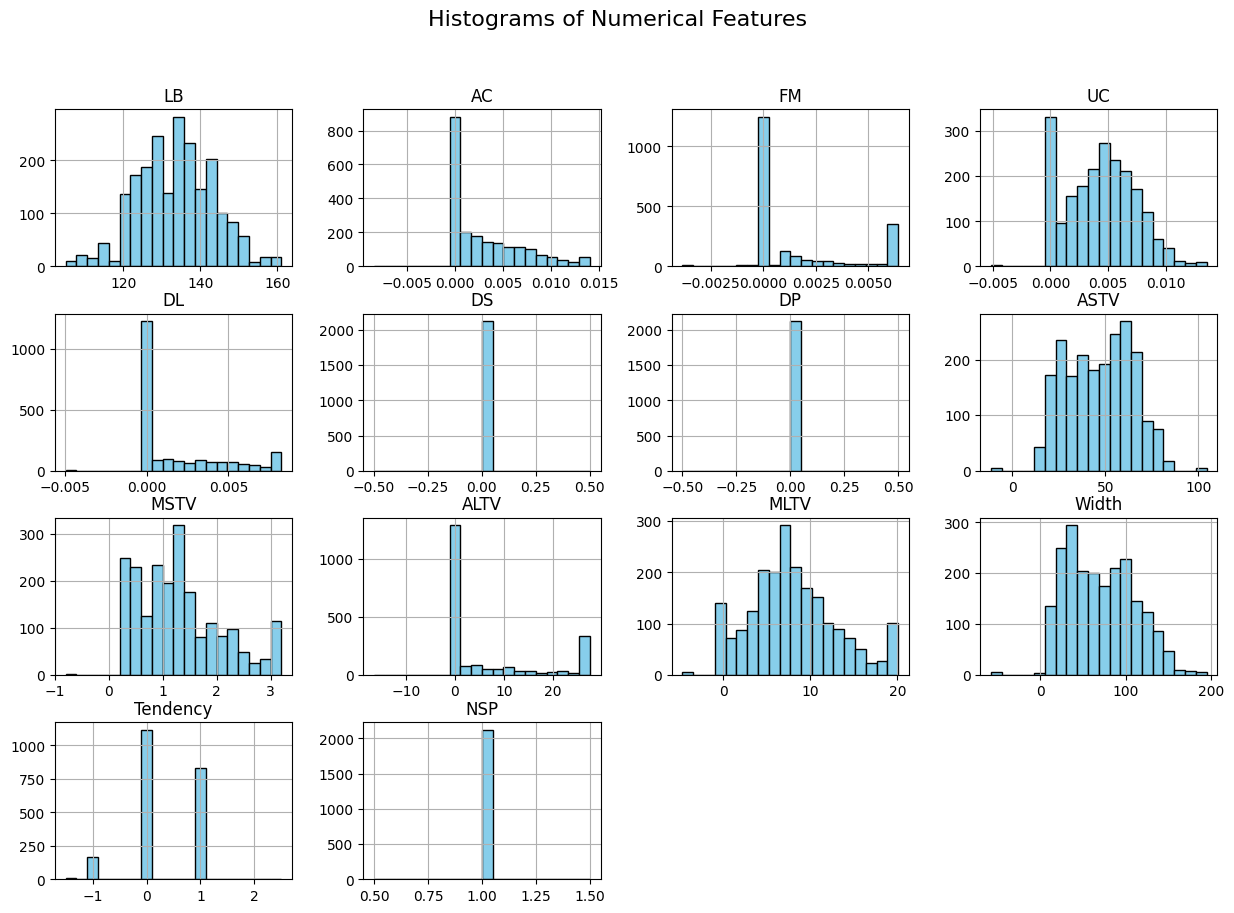

In [9]:
# Histograms for numerical columns
data.hist(bins=20, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Numerical Features', fontsize=16)
plt.show()

NSP
1.0    2126
Name: count, dtype: int64


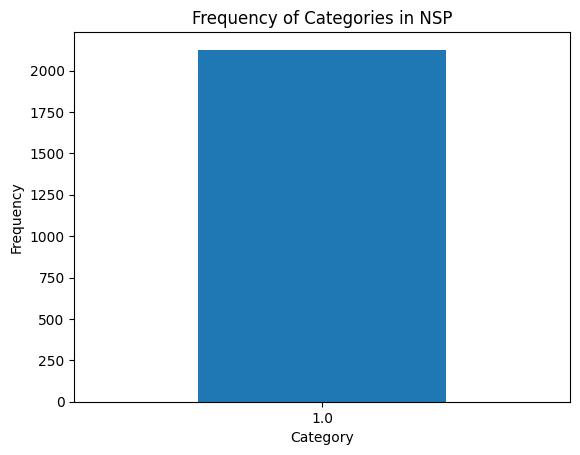

In [14]:
print(data['NSP'].value_counts())
data_cleaned = data.dropna(subset=['NSP'])
# Create a bar chart for the 'NSP' column
data_cleaned['NSP'].value_counts().plot(kind='bar')
plt.title('Frequency of Categories in NSP')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

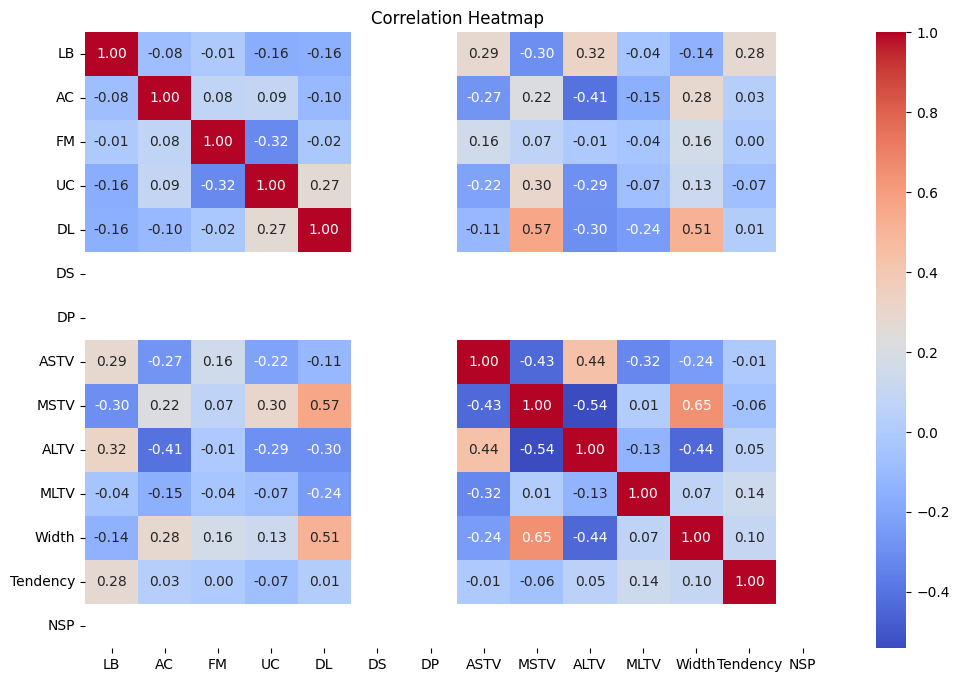

In [10]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

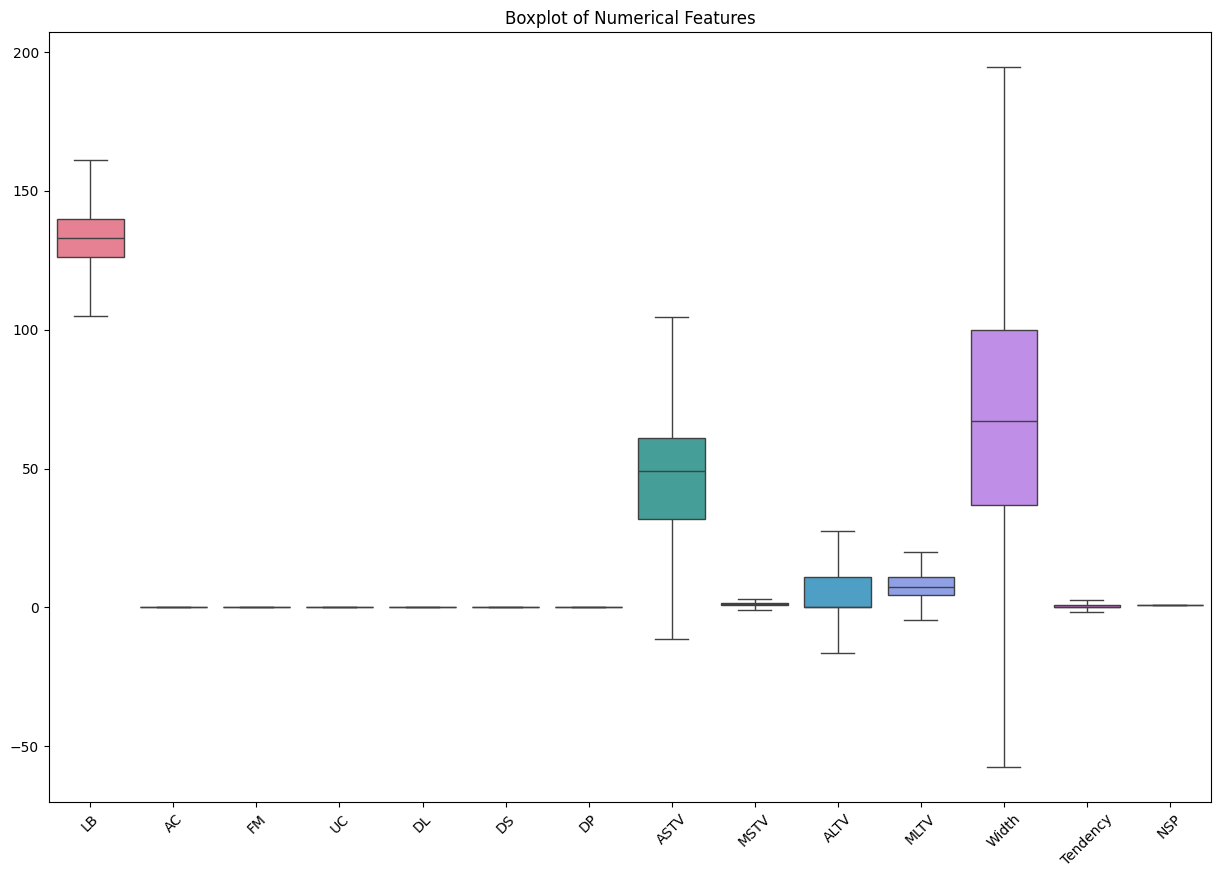

In [11]:
# Boxplots for distribution insights
plt.figure(figsize=(15, 10))
sns.boxplot(data=data)
plt.title('Boxplot of Numerical Features')
plt.xticks(rotation=45)
plt.show()

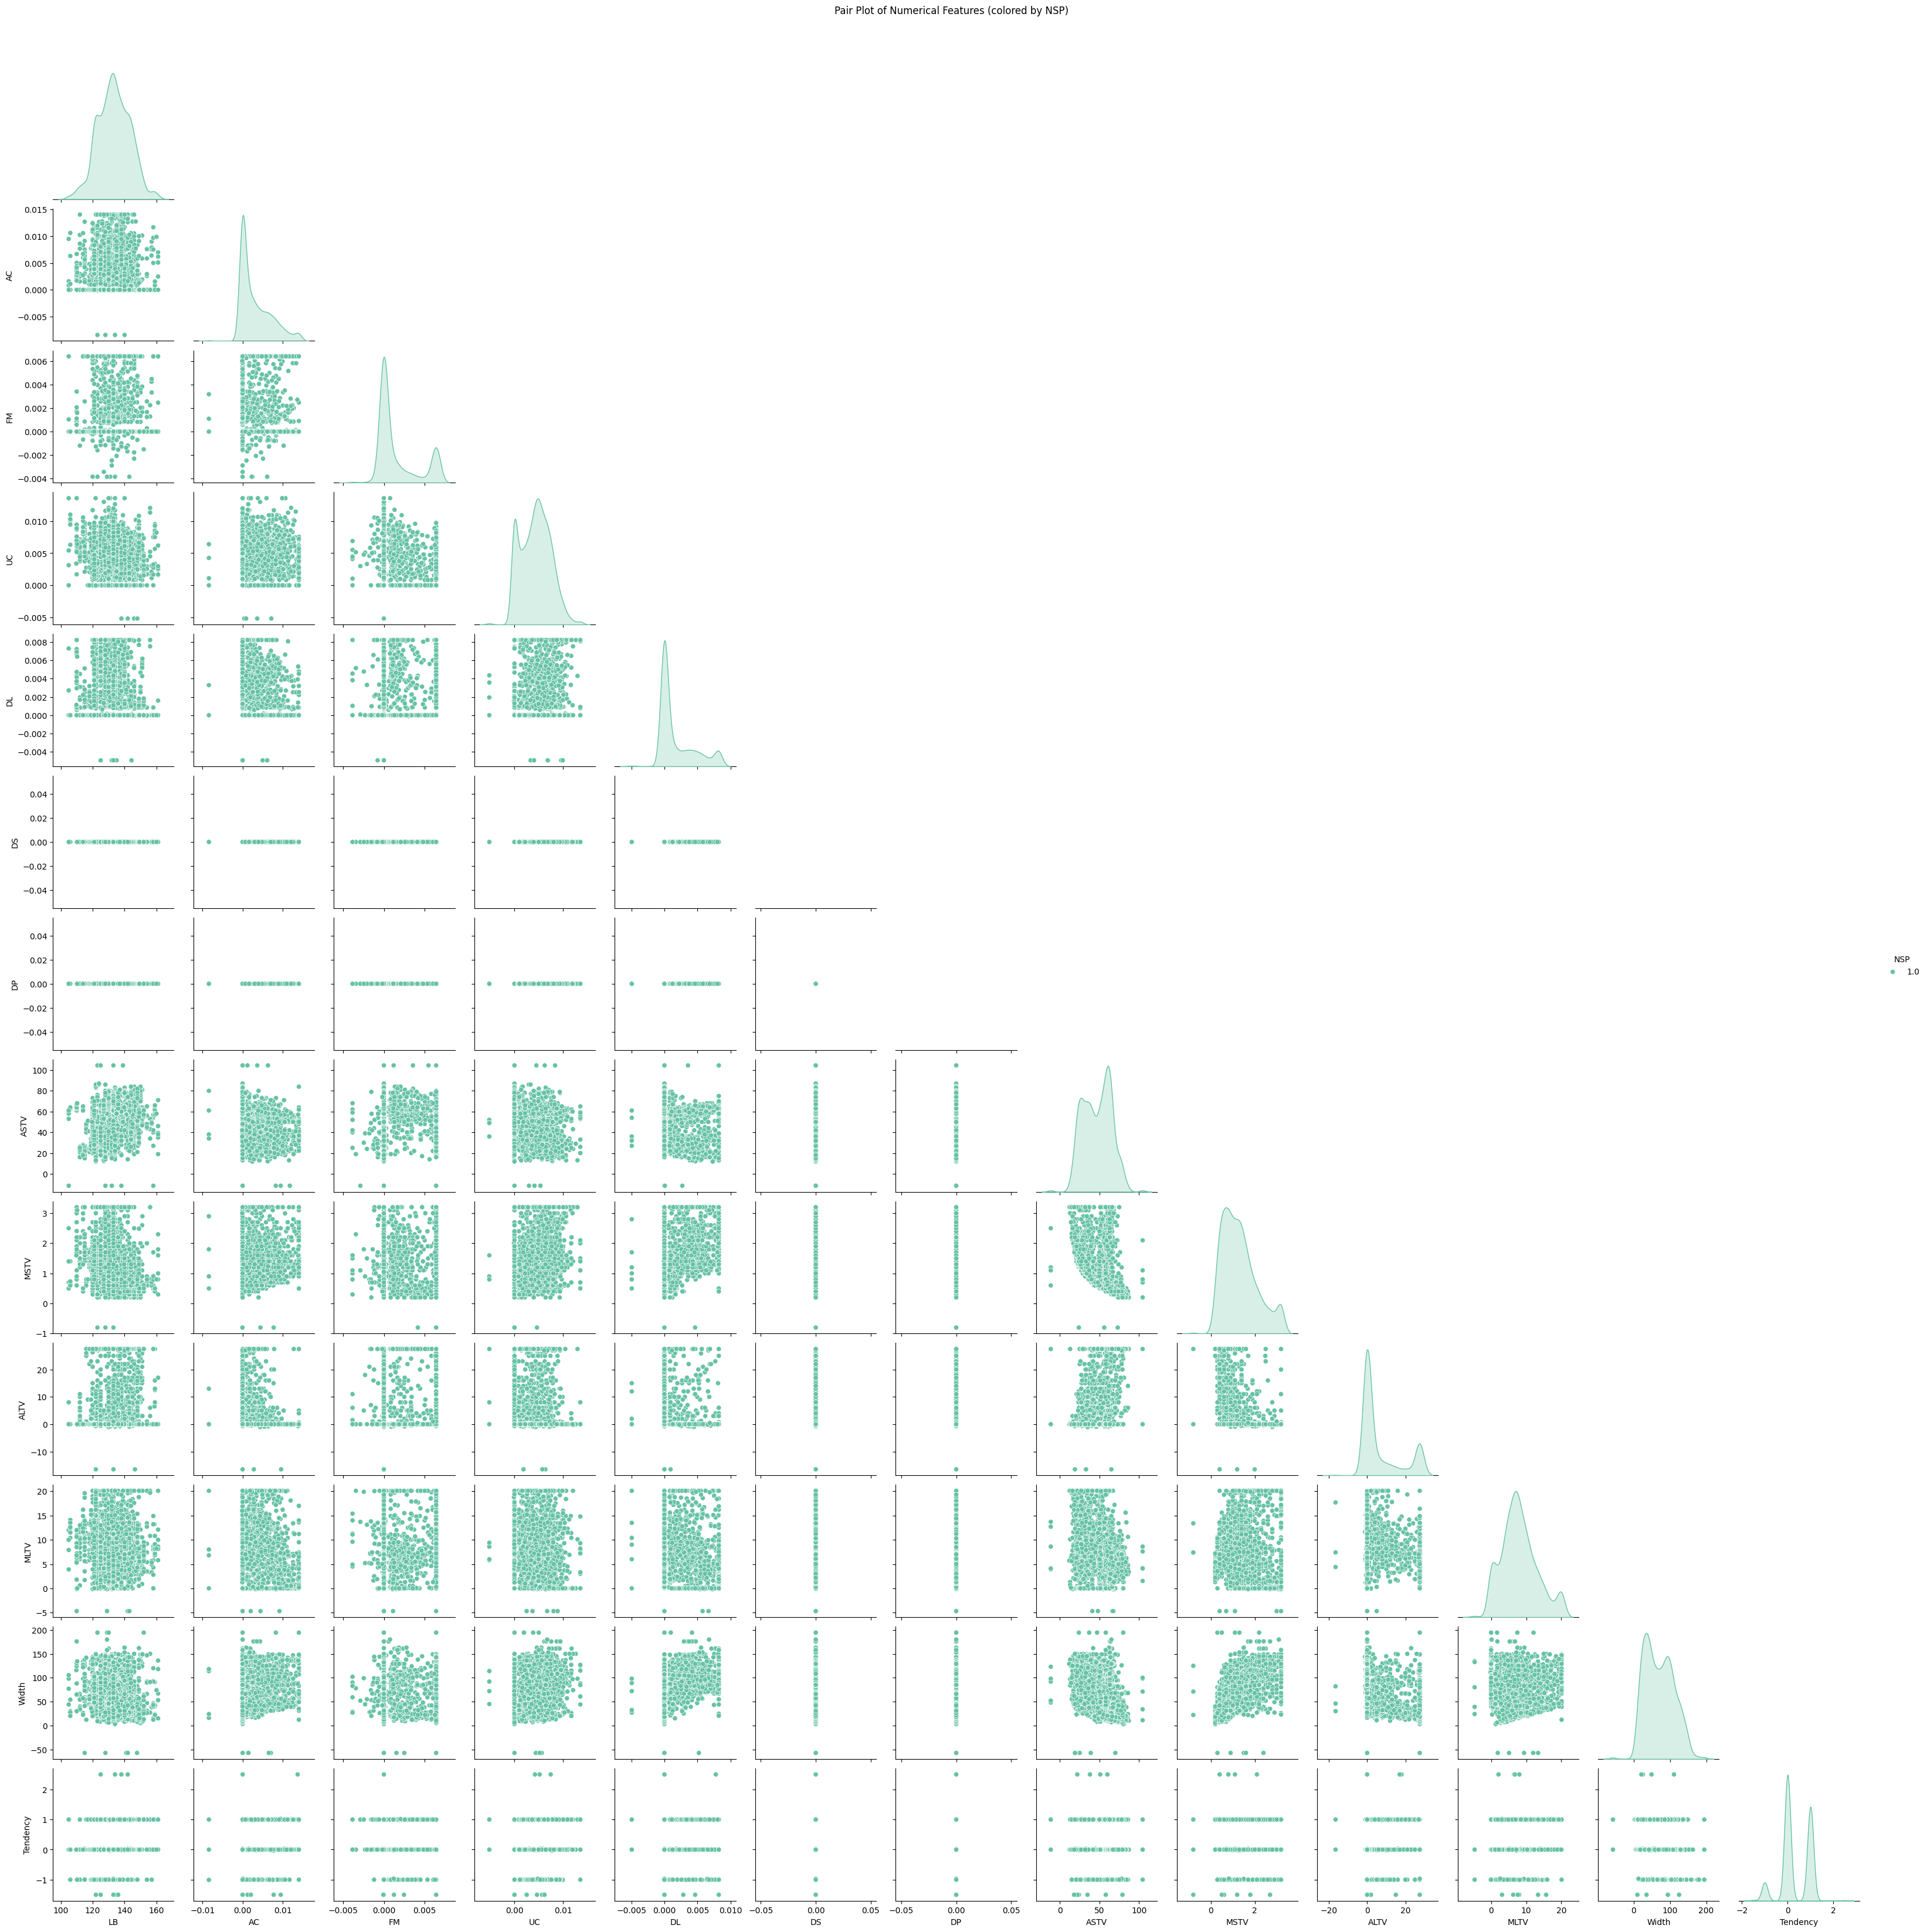

<ipython-input-15-1748b03ed312>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='NSP', y=col, data=data_cleaned, palette='Set2')


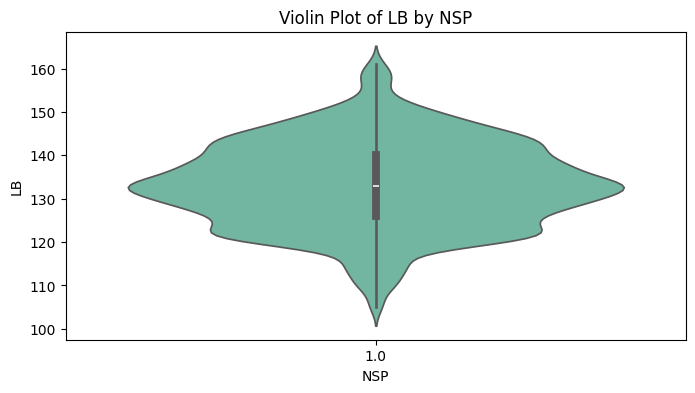

<ipython-input-15-1748b03ed312>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='NSP', y=col, data=data_cleaned, palette='Set2')


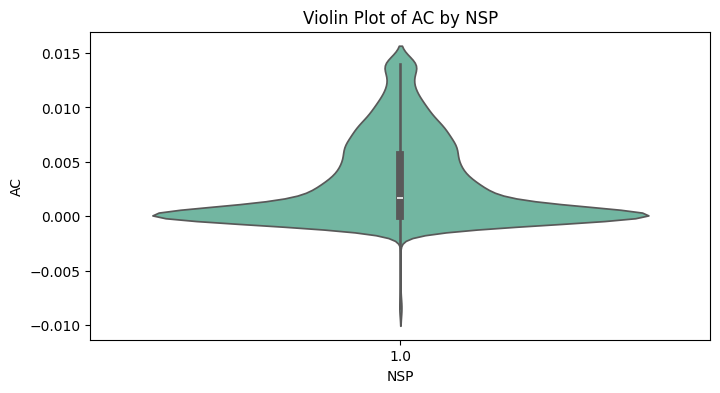

<ipython-input-15-1748b03ed312>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='NSP', y=col, data=data_cleaned, palette='Set2')


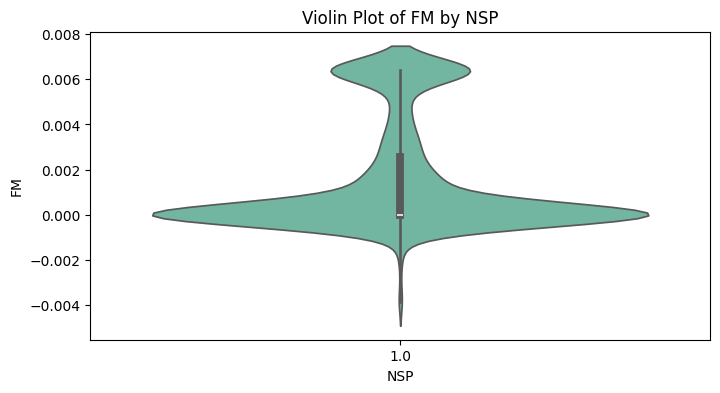

In [15]:
# Drop rows with missing values for simplicity
data_cleaned = data.dropna()
# Pair plot for numerical columns, colored by the categorical 'NSP'
sns.pairplot(data_cleaned, hue='NSP', diag_kind='kde', corner=True, palette='Set2')
plt.suptitle("Pair Plot of Numerical Features (colored by NSP)", y=1.02)
plt.show()
# Violin plot for selected numerical columns against 'NSP'
numerical_columns = ['LB', 'AC', 'FM']
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.violinplot(x='NSP', y=col, data=data_cleaned, palette='Set2')
    plt.title(f'Violin Plot of {col} by NSP')
    plt.show()


## Step 4: Pattern Recognition and Insights

In [16]:
# Identify significant correlations
significant_corr = correlation_matrix[(correlation_matrix > 0.5) | (correlation_matrix < -0.5)]
print("Significant Correlations:\n", significant_corr)

Significant Correlations:
            LB   AC   FM   UC        DL  DS  DP  ASTV      MSTV      ALTV  \
LB        1.0  NaN  NaN  NaN       NaN NaN NaN   NaN       NaN       NaN   
AC        NaN  1.0  NaN  NaN       NaN NaN NaN   NaN       NaN       NaN   
FM        NaN  NaN  1.0  NaN       NaN NaN NaN   NaN       NaN       NaN   
UC        NaN  NaN  NaN  1.0       NaN NaN NaN   NaN       NaN       NaN   
DL        NaN  NaN  NaN  NaN  1.000000 NaN NaN   NaN  0.566340       NaN   
DS        NaN  NaN  NaN  NaN       NaN NaN NaN   NaN       NaN       NaN   
DP        NaN  NaN  NaN  NaN       NaN NaN NaN   NaN       NaN       NaN   
ASTV      NaN  NaN  NaN  NaN       NaN NaN NaN   1.0       NaN       NaN   
MSTV      NaN  NaN  NaN  NaN  0.566340 NaN NaN   NaN  1.000000 -0.541156   
ALTV      NaN  NaN  NaN  NaN       NaN NaN NaN   NaN -0.541156  1.000000   
MLTV      NaN  NaN  NaN  NaN       NaN NaN NaN   NaN       NaN       NaN   
Width     NaN  NaN  NaN  NaN  0.514538 NaN NaN   NaN  0.64574

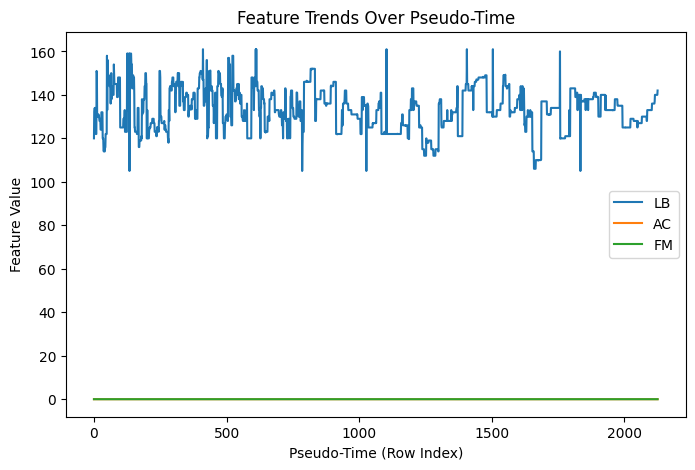

In [18]:
# Plot trends of key features over pseudo-time
data_cleaned[['LB', 'AC', 'FM']].plot(figsize=(8, 5), title='Feature Trends Over Pseudo-Time')
plt.xlabel('Pseudo-Time (Row Index)')
plt.ylabel('Feature Value')
plt.show()

## Step 6: Conclusion



#### Key Insights and Patterns:
1. **Category Distribution**:
   - The `NSP` column shows an uneven distribution of categories, with one category dominating the dataset. This imbalance could influence the outcomes of classification models.

2. **Relationships Between Features**:
   - Some numerical features show clear patterns and clusters when categorized by `NSP`, which indicates they might be useful for distinguishing between the categories.

3. **Feature Distributions**:
   - Features like `LB`, `AC`, and `FM` have noticeable differences in their distributions across `NSP` categories, making them likely candidates for further analysis or predictive modeling.

4. **Trends Over Time**:
   - When looking at trends over the dataset's index (treated as pseudo-time), the key features remain consistent without abrupt changes, suggesting a stable data collection process.

#### How These Findings Could Help:
1. **Addressing Data Imbalance**:
   - The uneven distribution in `NSP` means we may need to balance the data using techniques like resampling or adjusting model settings to ensure fair predictions.

2. **Focusing on Key Features**:
   - Features like `LB`, `AC`, and `FM` stand out as being significant in identifying categories. Future analysis should prioritize these variables.

3. **Exploring Temporal Aspects**:
   - While we didn’t have actual timestamps, trends suggest stability. Adding real temporal data could reveal new insights, like seasonal changes or time-based shifts.

4. **Next Steps**:
   - Build and test models to predict `NSP`, using the most relevant features identified here.
   - Investigate any anomalies in the data to ensure they don’t skew results.


      ............................... end  .........................